In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/PP/Downloads./cardekhodata.csv" )
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# Checking for Duplicate rows.

In [7]:
duplicate = df[df.duplicated()] 
print("Duplicate Rows :") 
duplicate 

Duplicate Rows :


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3577, 8)

In [ ]:
# We have dropped the 763 duplicate rows.

In [ ]:
# A heatmap to check the null values

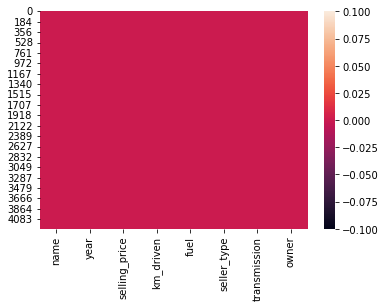

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Plotting the Pearson Correlation of Features

Highly Correlated Variables


Series([], dtype: float64)

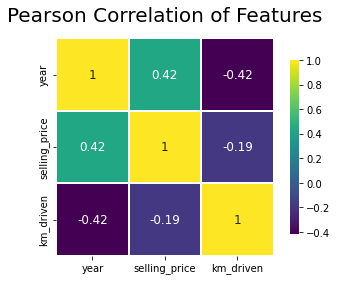

In [11]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(6,4))
    colormap = sns.diverging_palette(240, 20, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.8 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=20)
    plt.savefig('Heatmap.png')
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(df)

In [ ]:
# UNIVARIATE ANALYSIS

In [12]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [ ]:
#e have data ranging from years 1992 to 2020

In [13]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
sns.countplot(data=df,x="fuel")
plt.title('Number of Cars grouped by fuel type')
plt.ylabel('Number of Cars')
plt.xlabel('Fuel Types')
plt.show();

In [ ]:
# Most cars to be sold are either petrol or diesel.

C:\Users\PP\anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


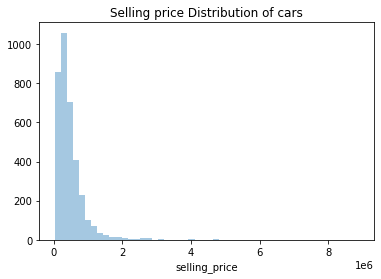

In [14]:
sns.distplot(df.selling_price, kde=False)
plt.title('Selling price Distribution of cars')
plt.show();

In [ ]:
# Here we can observe that majority of the cars are sold in the price range of 2-10 Lakh.

In [ ]:
# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='owner', ylabel='km_driven'>

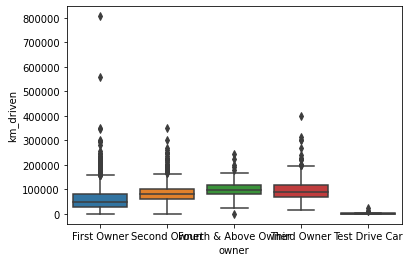

In [15]:
sns.boxplot(x="owner", y="km_driven", data=df)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

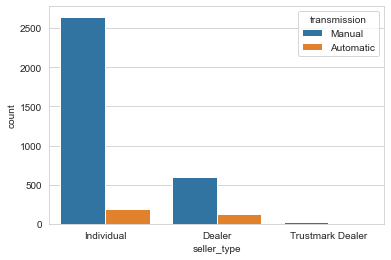

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='seller_type',hue='transmission',data=df)

In [ ]:
#  We can see that the cars being sold by an Individual with Manual transmission is highest

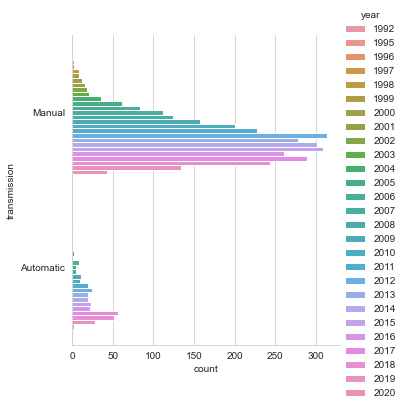

In [17]:
sns.catplot(y="transmission", hue="year", kind="count",
            data=df)

In [ ]:
#Here we can observe that most of the Automatic transmission cars have a Manufacturer Date 
#after 2008-2009 as there were very few automatic cars at that time in India.

In [ ]:
# Checking how the seller type influences the selling type :

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

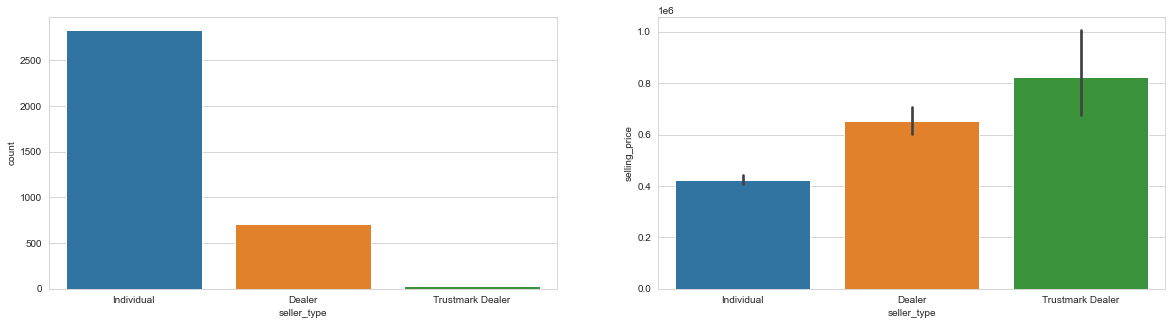

In [18]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x="seller_type", data=df, ax=axis1)
sns.barplot(x="seller_type", y="selling_price",data=df, ax=axis2 )

In [ ]:
# Number of Indiviual sellers is the highest but Trustmark dealers are selling the cars for the highest price

In [ ]:
# Effect of field "owner" to the selling price

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

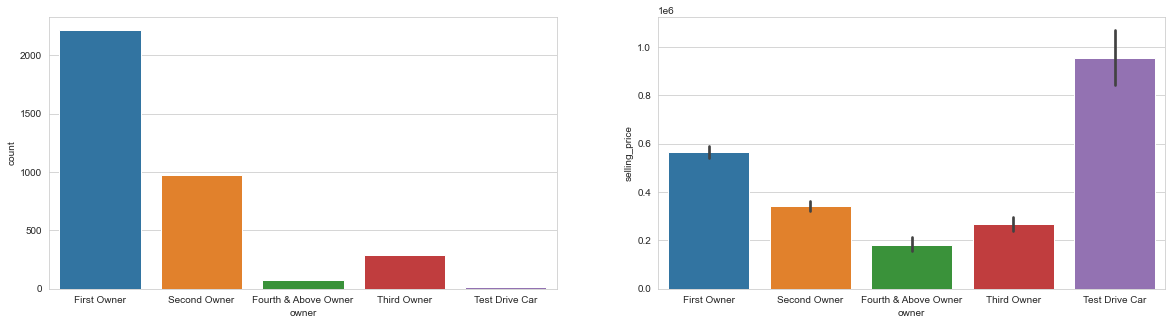

In [19]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="owner",data=df,ax=axis1)
sns.barplot(x="owner",y="selling_price",data=df,ax=axis2)

In [ ]:
# The number of respective owners and the selling price at which they are selling their graphs has a similar graph 
# except the Test Drive Car

In [ ]:
# How the transmission type affects selling price

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

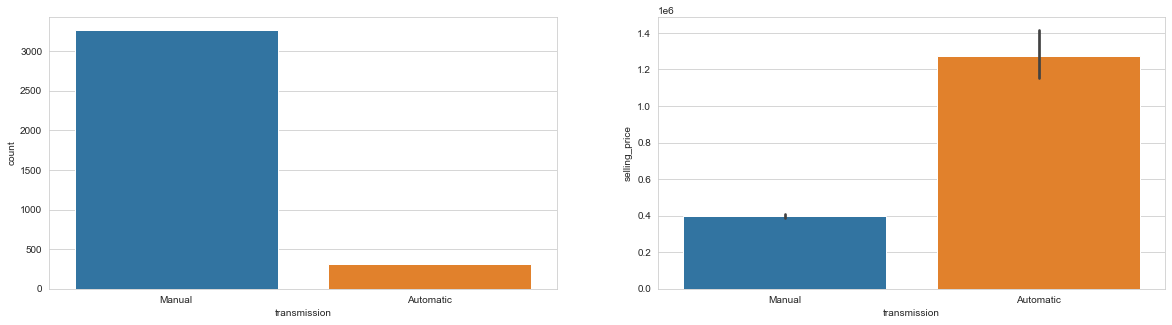

In [20]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="transmission",data=df,ax=axis1)
sns.barplot(x="transmission",y="selling_price",data=df,ax=axis2)

In [ ]:
# Number of manual cars being sold is more than automatic, but automatic cars sells at a higher price

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

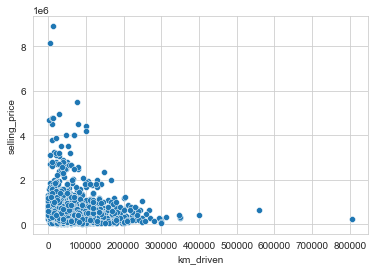

In [21]:
sns.scatterplot(data=df,x="km_driven",y="selling_price")

In [ ]:
#  Most of the cars are selling at a price less than Rs 20 lakh and the km on them are less than 3 lakh km.

In [ ]:
#  But we can see some outliers here where the price of the car can be as high as Rs 80lakh 
#  but cannot be driven for more than 8lakh km

In [ ]:
# Cars which are less driven sell for a higher price

<AxesSubplot:xlabel='Age', ylabel='selling_price'>

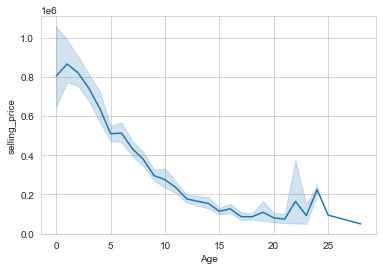

In [22]:
df["Age"] = 2020-df["year"]
df.drop('year',axis=1,inplace=True)
sns.lineplot(data=df,x="Age",y="selling_price")

In [ ]:
# We created a new feature called 'Age' using the 'year' of the car and appended it to the dataframe

# We can now drop the Year column from the dataframe.

In [ ]:
#  Newer cars sell for higher prices

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

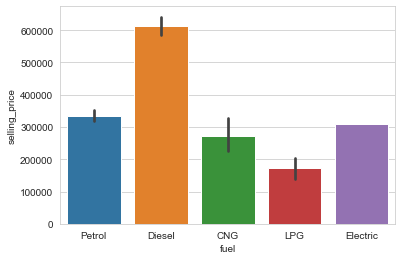

In [23]:
sns.barplot(data=df,x="fuel",y="selling_price")

In [ ]:
# Diesel cars have the most selling price folowed by petrol.